In [102]:
import matplotlib.pyplot as plt

from FinanceData import get_finance_data

In [103]:
colors = [
    "#ef4444",
    "#f97316",
    "#f59e0b",
    "#eab308",
    "#84cc16",
    "#22c55e",
    "#10b981",
    "#14b8a6",
    "#06b6d4",
    "#0ea5e9",
    "#3b82f6",
    "#6366f1",
    "#8b5cf6",
    "#a855f7",
    "#d946ef",
    "#ec4899",
    "#f43f5e",
    "#f3f4f6",
    "#d1d5db",
    "#6b7280",
    "#374151",
    "#111827"
]


def rgb_to_float(rgb):
    r = int(rgb[1:3], 16) / 255.0
    g = int(rgb[3:5], 16) / 255.0
    b = int(rgb[5:7], 16) / 255.0

    return (r, g, b)


color_pal = list(map(rgb_to_float, colors))

In [104]:
df = get_finance_data("ks11")
# df.drop("Date", inplace=True, axis=1)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-01-04,2000-01-04,1028.329956,1066.180054,1016.590027,1059.040039,1059.040039,195900.0
2000-01-05,2000-01-05,1006.869995,1026.520020,984.049988,986.309998,986.309998,257700.0
2000-01-06,2000-01-06,1013.950012,1014.900024,953.500000,960.789978,960.789978,203500.0
2000-01-07,2000-01-07,949.169983,970.159973,930.840027,948.650024,948.650024,215700.0
2000-01-10,2000-01-10,979.669983,994.940002,974.820007,987.239990,987.239990,240200.0


<AxesSubplot: title={'center': 'ks11'}, xlabel='Date'>

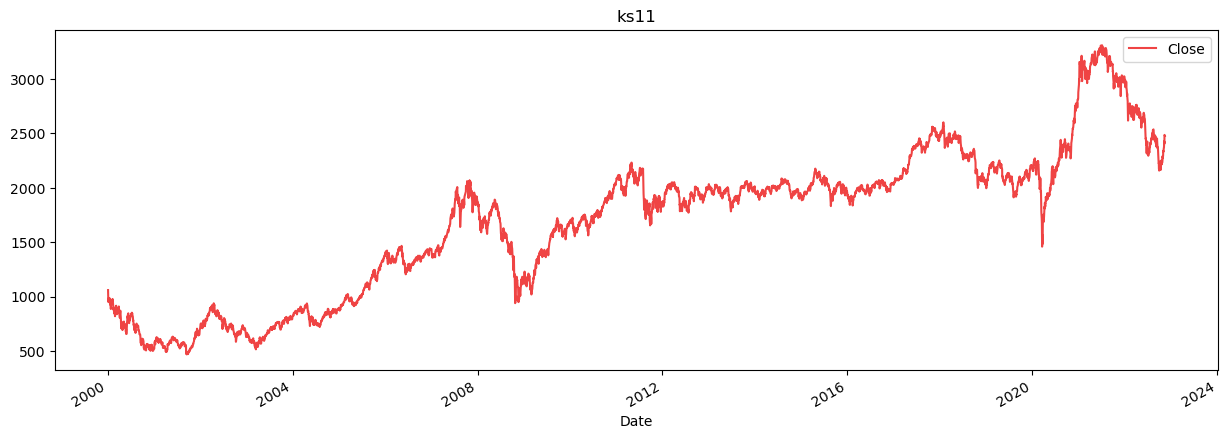

In [105]:
close_df = df[["Close"]]
close_df.plot(figsize=(15, 5), color=color_pal[0], title="ks11")

In [106]:
# Train/Test split
X_train = close_df.loc[close_df.index < "2019-01-01"]
X_test = close_df.loc[close_df.index >= "2019-01-01"]

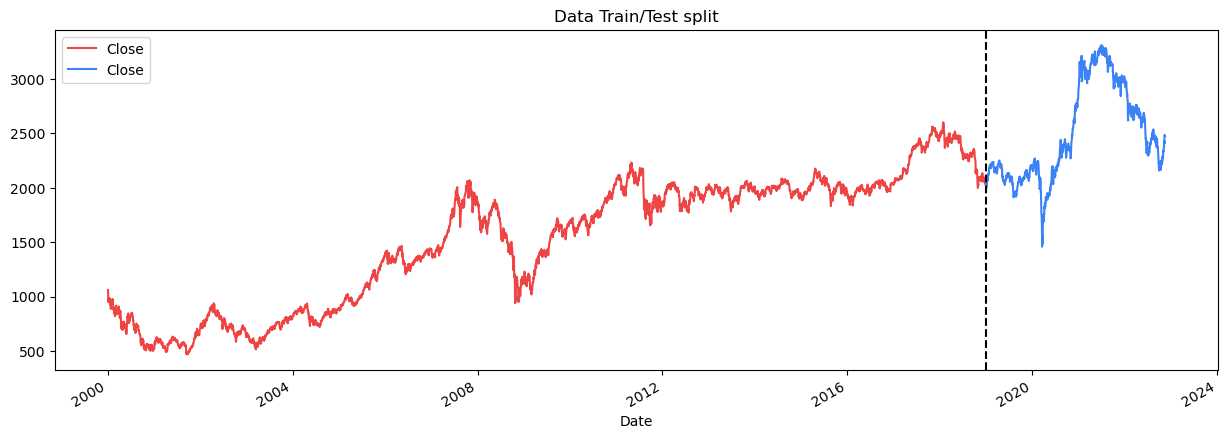

In [107]:
fix, ax = plt.subplots(figsize=(15, 5))
X_train.plot(ax=ax, label="Train set", color=color_pal[0], title="Data Train/Test split")
X_test.plot(ax=ax, label="Test set", color=color_pal[10])
ax.axvline("2019-01-01", color="black", ls="--")
plt.show()

[]

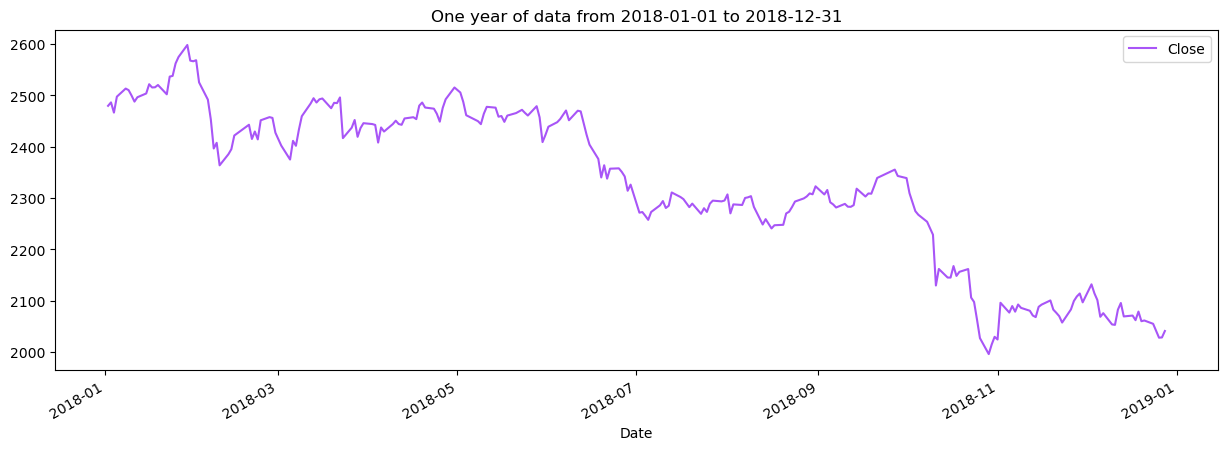

In [108]:
one_year_close_data = close_df.loc[(close_df.index >= "2018-01-01") & (close_df.index <= "2018-12-31")]
one_year_close_data.plot(figsize=(15,5), title="One year of data from 2018-01-01 to 2018-12-31", color=color_pal[13])
plt.plot()

[]

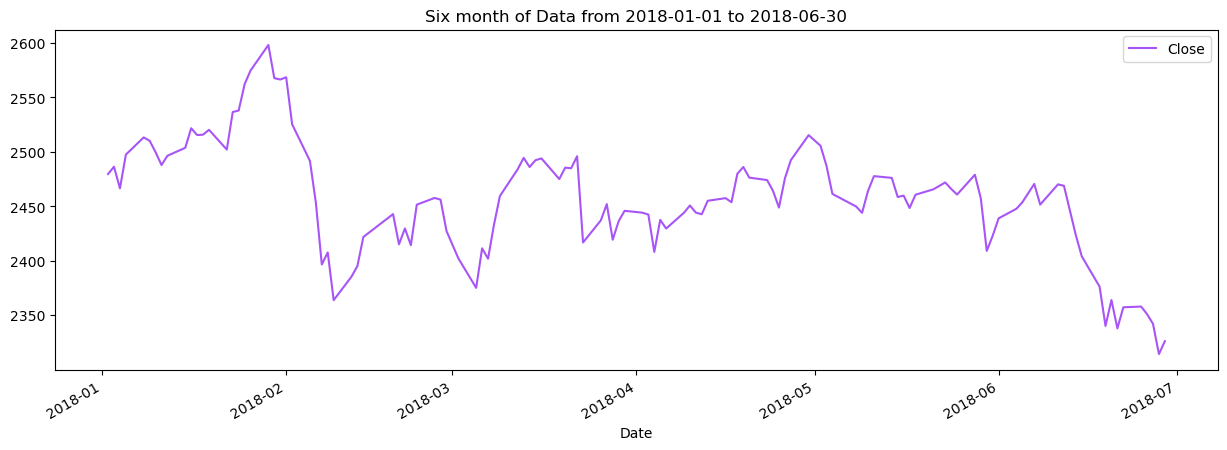

In [109]:
six_month_close_data = one_year_close_data.loc[(one_year_close_data.index >= "2018-01-01") & (one_year_close_data.index <= "2018-06-30")]
six_month_close_data.plot(figsize=(15, 5), title="Six month of Data from 2018-01-01 to 2018-06-30", color=color_pal[13])
plt.plot()

[]

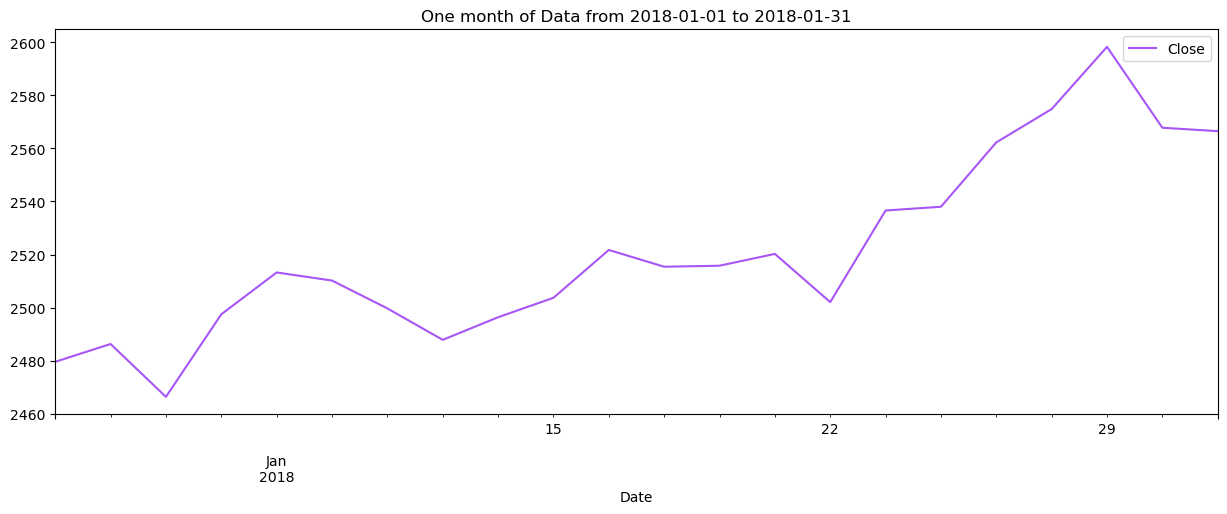

In [110]:
one_month_close_data = six_month_close_data.loc[(six_month_close_data.index >= "2018-01-01") & (six_month_close_data.index <= "2018-01-31")]
one_month_close_data.plot(figsize=(15, 5), title="One month of Data from 2018-01-01 to 2018-01-31", color=color_pal[13])
plt.plot()

[]

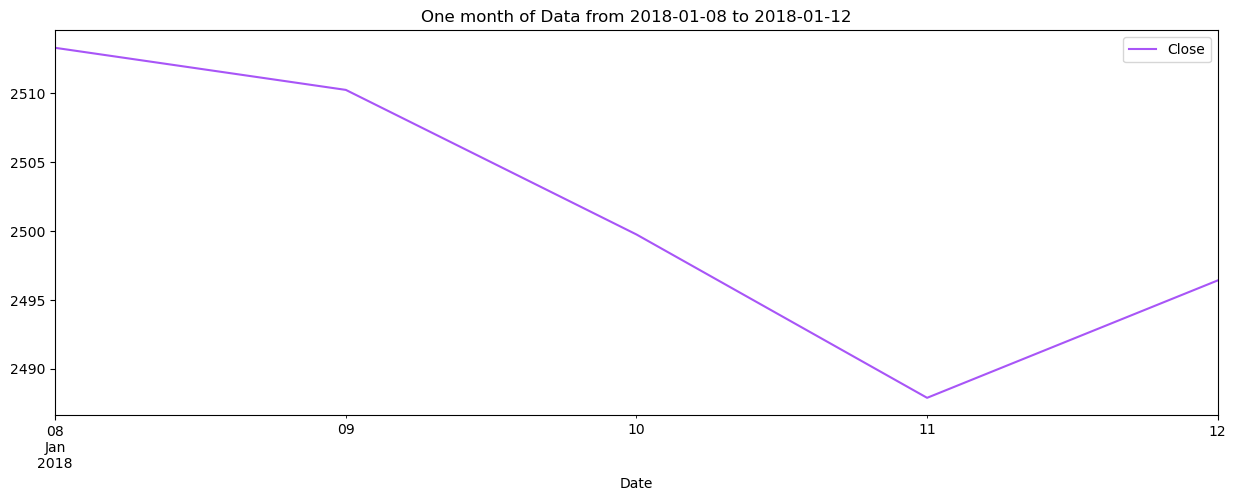

In [111]:
one_week_close_data1 = one_month_close_data.loc[(one_month_close_data.index >= "2018-01-08") & (one_month_close_data.index <= "2018-01-12")]
one_week_close_data1.plot(figsize=(15, 5), title="One month of Data from 2018-01-08 to 2018-01-12", color=color_pal[13])
plt.plot()

[]

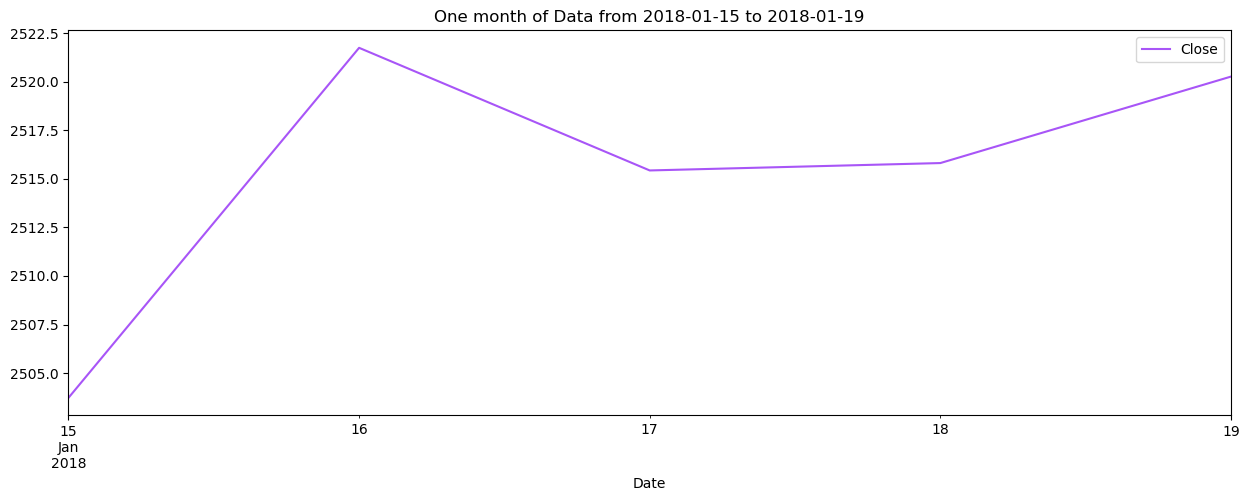

In [112]:
one_week_close_data2 = one_month_close_data.loc[(one_month_close_data.index >= "2018-01-15") & (one_month_close_data.index <= "2018-01-19")]
one_week_close_data2.plot(figsize=(15, 5), title="One month of Data from 2018-01-15 to 2018-01-19", color=color_pal[13])
plt.plot()

[]

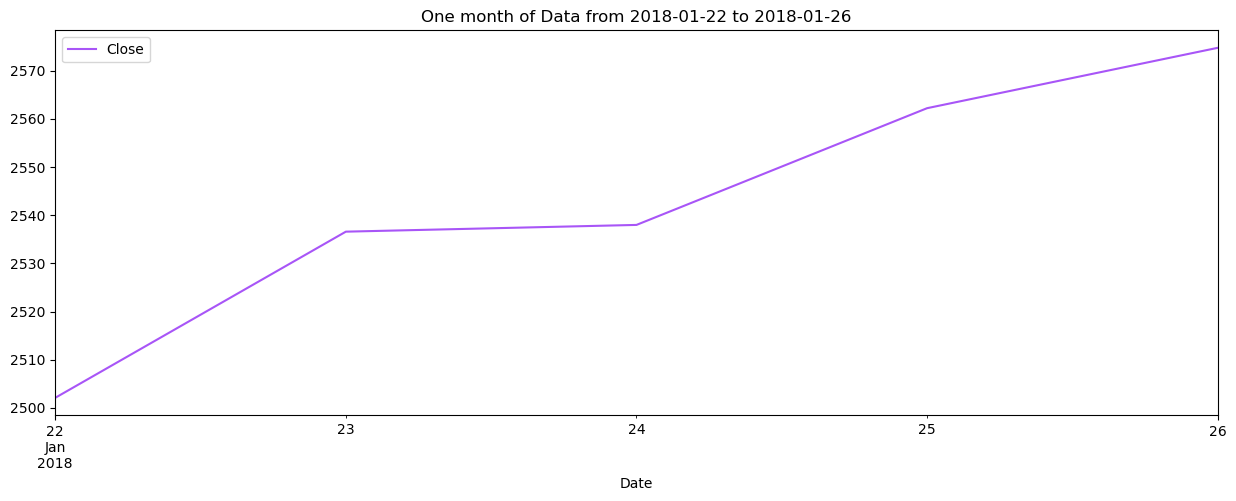

In [113]:
one_week_data3 = one_month_close_data.loc[(one_month_close_data.index >= "2018-01-22") & (one_month_close_data.index <= "2018-01-26")]
one_week_data3.plot(figsize=(15, 5), title="One month of Data from 2018-01-22 to 2018-01-26", color=color_pal[13])
plt.plot()

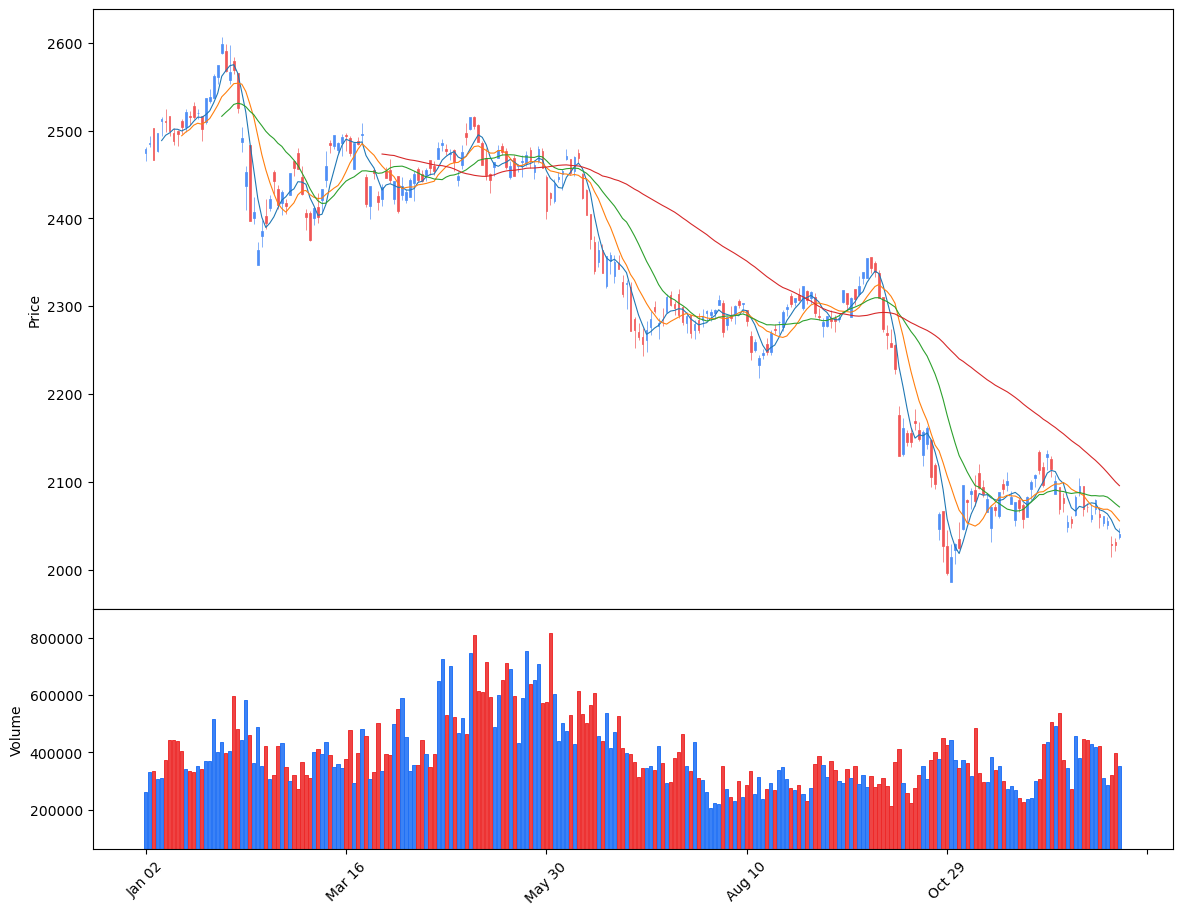

In [124]:
import mplfinance as mpf

one_year_df = df.loc[(df.index >= "2018-01-01") & (df.index <= "2018-12-30")]

mpf_mc = mpf.make_marketcolors(
    up=colors[10],
    down=colors[0],
    inherit=True
)

mpf_style = mpf.make_mpf_style(marketcolors=mpf_mc)

mpf.plot(one_year_df, type="candle", style=mpf_style, mav=(5, 10, 20, 60), volume=True, figsize=(15, 12))

In [125]:
df["EMA_9"] = df["Close"].ewm(9).mean().shift()
df["SMA_5"] = df["Close"].rolling(5).mean().shift()
df["SMA_10"] = df["Close"].rolling(10).mean().shift()
df["SMA_15"] = df["Close"].rolling(15).mean().shift()
df["SMA_20"] = df["Close"].rolling(20).mean().shift()
df["SMA_60"] = df["Close"].rolling(60).mean().shift()

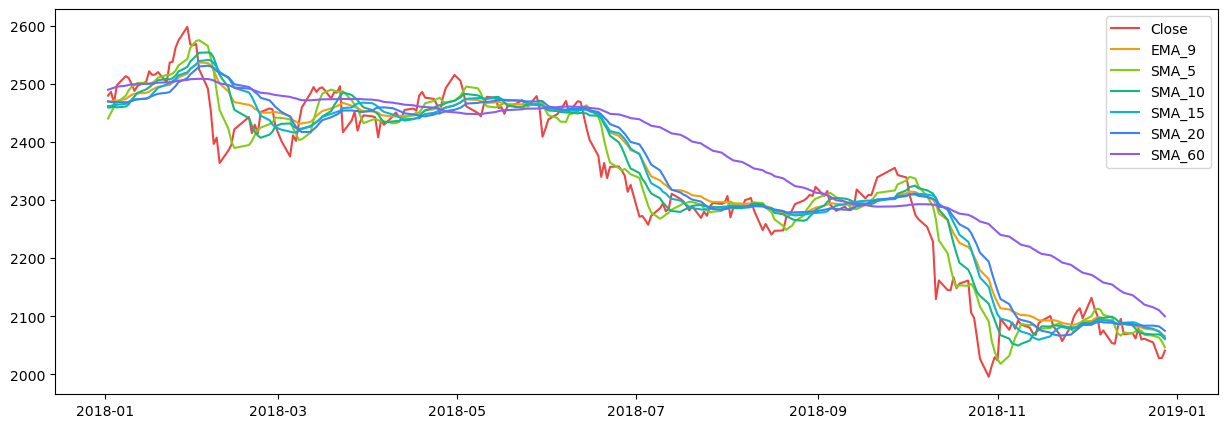

In [126]:
one_year_df = df.loc[(df.index >= "2018-01-01") & (df.index <= "2018-12-31")]

plt.plot(one_year_df["Close"], color=color_pal[0], label="Close")
plt.plot(one_year_df["EMA_9"], color=color_pal[2], label="EMA_9")
plt.plot(one_year_df["SMA_5"], color=color_pal[4], label="SMA_5")
plt.plot(one_year_df["SMA_10"], color=color_pal[6], label="SMA_10")
plt.plot(one_year_df["SMA_15"], color=color_pal[8], label="SMA_15")
plt.plot(one_year_df["SMA_20"], color=color_pal[10], label="SMA_20")
plt.plot(one_year_df["SMA_60"], color=color_pal[12], label="SMA_60")
plt.legend()

fig = plt.gcf()
fig.set_size_inches(15, 5, forward=True)

In [127]:
def rsi(df, n=14):
    close = df["Close"]
    delta = close.diff()[1:]
    
    prices_up = delta.copy()
    prices_down = delta.copy()
    
    prices_up[prices_up < 0] = 0
    prices_down[prices_down > 0] = 0
    
    roll_up = prices_up.rolling(n).mean()
    roll_down = prices_down.abs().rolling(n).mean()
    
    rs = roll_up / roll_down
    rsi = 100.0 - (100.0 / (1.0 + rs))
    
    return rsi

df["RSI"] = rsi(df).fillna(0)

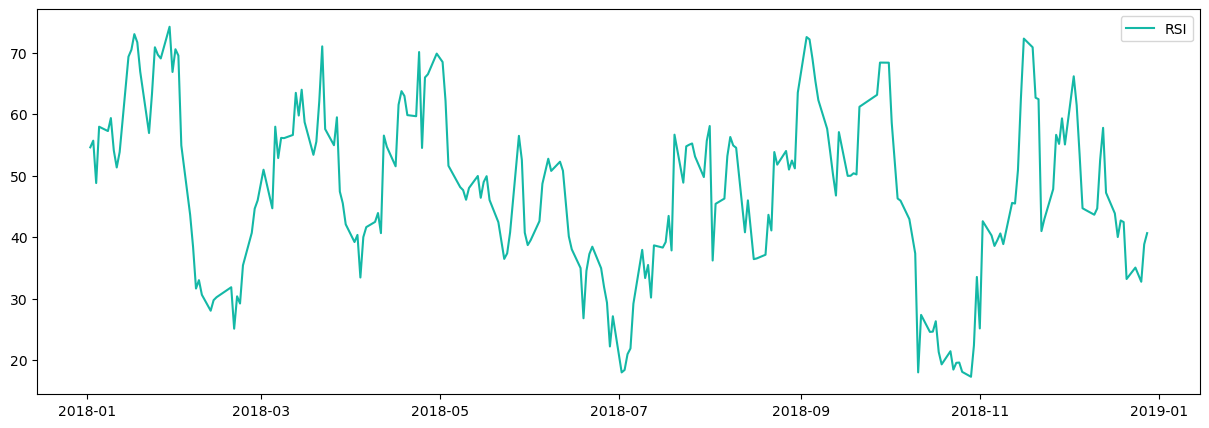

In [128]:
one_year_df = df.loc[(df.index >= "2018-01-01") & (df.index <= "2018-12-31")]

# plt.plot(one_year_df["Close"], color=color_pal[0], label="Close")
plt.plot(one_year_df["RSI"], color=color_pal[7], label="RSI")
plt.legend()

fig = plt.gcf()
fig.set_size_inches(15, 5, forward=True)

In [129]:
import pandas as pd

EMA_12 = pd.Series(df["Close"].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(df["Close"].ewm(span=26, min_periods=26).mean())

df["MACD"] = pd.Series(EMA_12 - EMA_26)
df["MACD_signal"] = pd.Series(df.MACD.ewm(span=9, min_periods=9).mean())

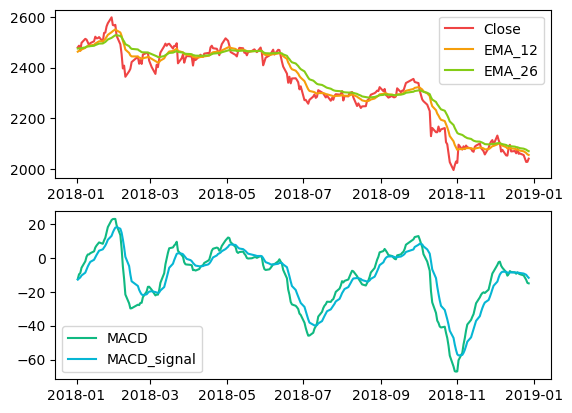

In [144]:
one_year_df = df.loc[(df.index >= "2018-01-01") & (df.index <= "2018-12-31")]
one_year_EMA_12 = EMA_12.loc[(df.index >= "2018-01-01") & (df.index <= "2018-12-31")]
one_year_EMA_26 = EMA_26.loc[(df.index >= "2018-01-01") & (df.index <= "2018-12-31")]

fix, axs = plt.subplots(2)

axs[0].plot(one_year_df["Close"], color=color_pal[0], label="Close")
axs[0].plot(one_year_EMA_12, color=color_pal[2], label="EMA_12")
axs[0].plot(one_year_EMA_26, color=color_pal[4], label="EMA_26")
axs[0].legend()

axs[1].plot(one_year_df["MACD"], color=color_pal[6], label="MACD")
axs[1].plot(one_year_df["MACD_signal"], color=color_pal[8], label="MACD_signal")
axs[1].legend()

fig.set_size_inches(20, 10, forward=True)